In [71]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import keras.backend as K
from keras.models import model_from_json
from keras.models import Sequential 


In [72]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from keras.utils import to_categorical
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import PIL.Image
import tensorflow as tf
import keras.backend as K
from keras.utils import to_categorical
from keras.models import Sequential


In [6]:
#loadata 
train=pd.read_excel('C:/Datasets Temp/MNIST Sign/sign_mnist_train.xlsx',sheetname="sign_mnist_train")
train_label=train['label']
train=train.drop('label',1)
train=(np.array(train))
test=pd.read_excel('C:/Datasets Temp/MNIST Sign/sign_mnist_test.xlsx',sheetname="sign_mnist_test")
test_label=test['label']
test=test.drop('label',1)
test=(np.array(test))


c:\users\shantanu singh\appdata\local\programs\python\python35\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [47]:
#one hot encoding of labels
def one_hot(labels):
    labels=pd.Series(labels)
    labels=pd.get_dummies(labels)
    return np.array(labels)

In [48]:
#Shapeing 1d vec to image matrix
def remodel(vec):
    mat=[]
    for i in range(0,len(vec)):
        mat.append((vec[0]).reshape(28,28,1))
    return np.array(mat)
        
    

In [49]:
train_data,test_data,train_labels,test_labels=remodel(train),remodel(test),one_hot(train_label),one_hot(test_label)

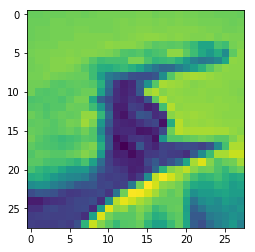

In [152]:
plt.imshow(test_data[400].reshape(28,28))#checking data 

In [51]:
test_data.shape

(7172, 28, 28, 1)

In [56]:
def custom_net(input_shape):# Custom Model
    X_input = Input(input_shape)
    X = Conv2D(5, (3,3), strides = (5, 5), name = 'conv1')(X_input)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2),strides=(2,2),name='max_pool1')(X)
    X = Conv2D(10, (1,1), strides = (2, 2), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2),strides=(1,1),name='max_pool2')(X)
    X = Flatten()(X)
    X = Dense(24, activation='softmax', name='fc')(X)
    model = Model(inputs=X_input,outputs=X,name="custom_net")
    return model
    
    

In [73]:
cModel=custom_net(train_data.shape[1:])

In [74]:
cModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [75]:
cModel.fit(x=train_data,y=train_labels,epochs=5)

Epoch 1/5
27455/27455 [==============================] - 7s 246us/step - loss: 0.3860 - acc: 0.9570
Epoch 2/5
27455/27455 [==============================] - 6s 220us/step - loss: 0.1733 - acc: 0.9583
Epoch 3/5
27455/27455 [==============================] - 6s 217us/step - loss: 0.1731 - acc: 0.9583
Epoch 4/5
27455/27455 [==============================] - 5s 194us/step - loss: 0.1731 - acc: 0.9583
Epoch 5/5
27455/27455 [==============================] - 6s 205us/step - loss: 0.1731 - acc: 0.9583


In [76]:
preds = cModel.evaluate(x=test_data,y=test_labels)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7172/7172 [==============================] - 1s 131us/step

Loss = 0.21275086788179087
Test Accuracy = 0.9583333134651184


In [153]:
out=cModel.predict(np.expand_dims(test_data[0],axis=0))

In [154]:
out=(out.reshape(24,))

In [155]:
out=list(out)
print(out)

[0.012680519, 0.015461329, 0.28293222, 0.028705392, 0.002595333, 0.0068219607, 0.014734683, 0.00093763636, 0.057917815, 0.015457009, 0.012238686, 0.16291837, 0.0012522843, 0.02245129, 0.10978252, 0.00830903, 0.077858075, 0.027935622, 0.027070155, 0.028896196, 0.0338047, 0.017531924, 0.0045055114, 0.027201872]


In [156]:
max_value = max(out)
max_index = out.index(max_value)

In [157]:
print(max_index-1)

1


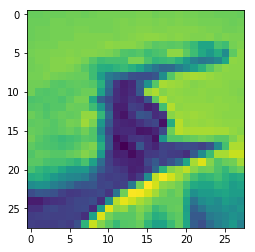

In [159]:
plt.imshow(test_data[0].reshape(28,28))#checking data 